In [1]:
import numpy as np
import pandas as pd

In [2]:
#Load the dataset
Data = pd.read_csv('/Users/teneshasmith/Downloads/Breast_Cancer.csv')

In [3]:
Data

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [2]:
#Relevant Packages
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
#Extracting input and output data
X = Data.drop(['Status', 'Survival Months'], axis=1)#all columns EXCEPT Status and Survival
y=Data.iloc[:,15] #Survival is our target feature hence column 14

In [6]:
#confirming columns are correctly allocated
X

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1


In [7]:
y

0       Alive
1       Alive
2       Alive
3       Alive
4       Alive
        ...  
4019    Alive
4020    Alive
4021    Alive
4022    Alive
4023    Alive
Name: Status, Length: 4024, dtype: object

In [8]:
#encoding the input values and confirming
ct = ColumnTransformer(
[("t2", OrdinalEncoder(), [1,2,3,4,5,6,7,8,10,11])],
remainder='passthrough')
X=ct.fit_transform(X)
print(ct.fit_transform(X))

[[ 1.  0.  0. ...  1. 24.  1.]
 [ 1.  1.  1. ...  1. 14.  5.]
 [ 0.  2.  2. ...  1. 14.  7.]
 ...
 [ 1.  1.  0. ...  0. 11.  3.]
 [ 0.  1.  0. ...  1. 11.  1.]
 [ 1.  1.  0. ...  1.  7.  2.]]


In [9]:
#encoding the output data (Survival)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

#checking columns have been correctly encoded
y

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
X

array([[ 2.,  1.,  0., ...,  4., 24.,  1.],
       [ 2.,  1.,  1., ..., 35., 14.,  5.],
       [ 2.,  0.,  2., ..., 63., 14.,  7.],
       ...,
       [ 2.,  1.,  1., ..., 22., 11.,  3.],
       [ 0.,  0.,  1., ..., 44., 11.,  1.],
       [ 2.,  1.,  1., ..., 30.,  7.,  2.]])

In [11]:
#normalising the input data
scaler = MinMaxScaler()
X=scaler.fit_transform(X)
print(scaler.fit_transform(X))

[[1.         0.25       0.         ... 0.02158273 0.38333333 0.        ]
 [1.         0.25       0.33333333 ... 0.24460432 0.21666667 0.08888889]
 [1.         0.         0.66666667 ... 0.44604317 0.21666667 0.13333333]
 ...
 [1.         0.25       0.33333333 ... 0.15107914 0.16666667 0.04444444]
 [0.         0.         0.33333333 ... 0.30935252 0.16666667 0.        ]
 [1.         0.25       0.33333333 ... 0.20863309 0.1        0.02222222]]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [13]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
## Evaluation metrics ##
# calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
# calculate mis-classification
    conf_misclassification = 1- conf_accuracy
 # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
# calculate the specificity
    conf_specificity = (TN / float(TN + FP))
# calculate precision
    conf_precision = (TP / float(TP + FP))
# calculate f_1 score//calculating the score and printing the results
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

In [16]:
# get a stacking ensemble of models
def get_stacking():
   level0 = list()
   level0.append(('lr',  LogisticRegression()))
   level0.append(('svm', svm.SVC(probability=True)))  
   level0.append(('nb', GaussianNB()))
 # define meta learner model
   level1 = RandomForestClassifier()
 # define the stacking ensemble
   model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
   return model

model = get_stacking()

In [17]:
# Train the stacking ensemble
model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('svm', SVC(probability=True)),
                               ('nb', GaussianNB())],
                   final_estimator=RandomForestClassifier())

In [18]:
# Step 7: Make predictions on the test set
y_pred = model.predict(X_test)

In [19]:
print(y_pred[:4], "...")

[0 0 0 0] ...


Text(0.5, 1.0, 'Hybrid-Ensemble Model 1')

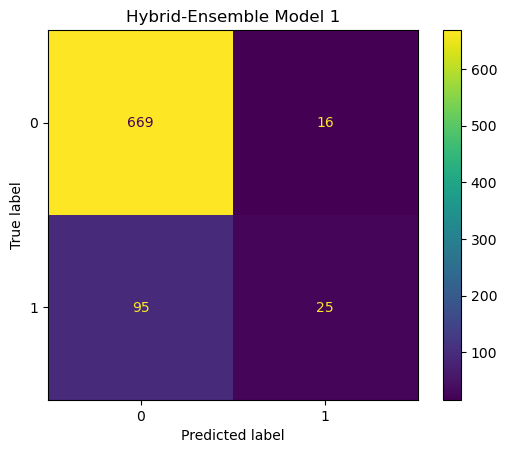

In [20]:
#confusion matrix//code applies labels and specifies the design of the CF//based on prediction results
cm1 = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=model.classes_)
#display the plot and add a title
disp.plot()
plt.title("Hybrid-Ensemble Model 1")

In [21]:
#printing the evaluation metrics for the Hybrid Model
print('model metrics\n')
confusion_metrics(cm1)
print('\n\n')

model metrics

True Positives: 25
True Negatives: 669
False Positives: 16
False Negatives: 95
--------------------------------------------------
Accuracy: 0.86
Mis-Classification: 0.14
Sensitivity: 0.21
Specificity: 0.98
Precision: 0.61
f_1 Score: 0.31





Model 2

In [22]:
# get a stacking ensemble of models
def get_stacking():
   level0 = list()
   level0.append(('rf',  RandomForestClassifier()))
   level0.append(('svm', svm.SVC(probability=True)))  
   level0.append(('nb', GaussianNB()))
 # define meta learner model
   level1 = LogisticRegression()
 # define the stacking ensemble
   model2 = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
   return model2

model2 = get_stacking()

In [23]:
# Train the stacking ensemble
model2.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier()),
                               ('svm', SVC(probability=True)),
                               ('nb', GaussianNB())],
                   final_estimator=LogisticRegression())

In [24]:
# Step 7: Make predictions on the test set
y_pred2 = model2.predict(X_test)
print(y_pred2[:4], "...")

[0 0 0 0] ...


Text(0.5, 1.0, 'Hybrid-Ensemble Model 2')

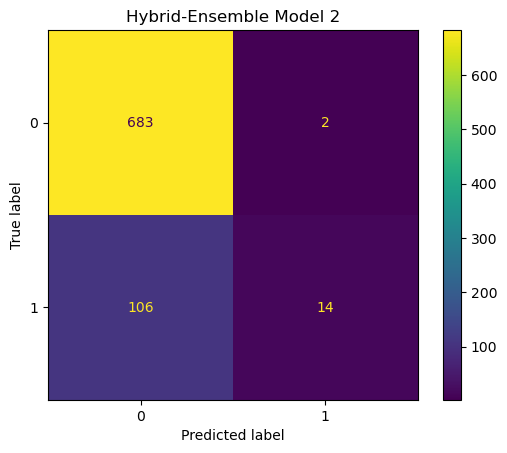

In [25]:
#confusion matrix//code applies labels and specifies the design of the CF//based on prediction results
cm2 = confusion_matrix(y_test, y_pred2, labels=model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=model2.classes_)
#display the plot and add a title
disp.plot()
plt.title("Hybrid-Ensemble Model 2")

In [26]:
#printing the evaluation metrics for the Hybrid Model
print('model2 metrics\n')
confusion_metrics(cm2)
print('\n\n')

model2 metrics

True Positives: 14
True Negatives: 683
False Positives: 2
False Negatives: 106
--------------------------------------------------
Accuracy: 0.87
Mis-Classification: 0.13
Sensitivity: 0.12
Specificity: 1.0
Precision: 0.88
f_1 Score: 0.21





In [27]:
# get a stacking ensemble of models
def get_stacking():
   level0 = list()
   level0.append(('rf',  RandomForestClassifier()))
   level0.append(('lr', LogisticRegression()))  
   level0.append(('nb', GaussianNB()))
 # define meta learner model
   level1 = svm.SVC(probability=True)
 # define the stacking ensemble
   model3 = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
   return model3

model3 = get_stacking()

In [28]:
# Train the stacking ensemble
model3.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier()),
                               ('lr', LogisticRegression()),
                               ('nb', GaussianNB())],
                   final_estimator=SVC(probability=True))

In [29]:
# Step 7: Make predictions on the test set
y_pred3 = model3.predict(X_test)
print(y_pred3[:4], "...")

[0 0 0 0] ...


Text(0.5, 1.0, 'Hybrid-Ensemble Model 3')

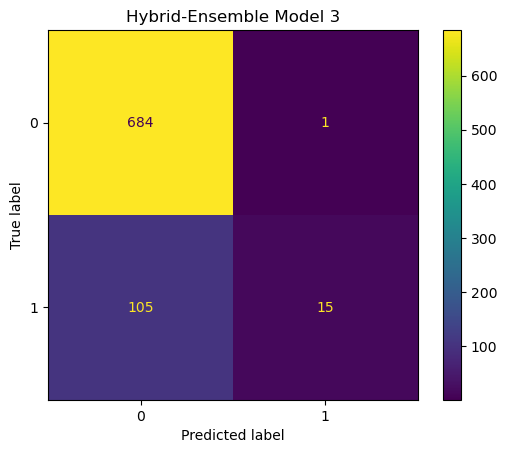

In [30]:
#confusion matrix//code applies labels and specifies the design of the CF//based on prediction results
cm3 = confusion_matrix(y_test, y_pred3, labels=model3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=model3.classes_)
#display the plot and add a title
disp.plot()
plt.title("Hybrid-Ensemble Model 3")

In [31]:
#printing the evaluation metrics for the Hybrid Model
print('model3 metrics\n')
confusion_metrics(cm3)
print('\n\n')

model3 metrics

True Positives: 15
True Negatives: 684
False Positives: 1
False Negatives: 105
--------------------------------------------------
Accuracy: 0.87
Mis-Classification: 0.13
Sensitivity: 0.12
Specificity: 1.0
Precision: 0.94
f_1 Score: 0.22





In [32]:
# get a stacking ensemble of models
def get_stacking():
   level0 = list()
   level0.append(('rf',  RandomForestClassifier()))
   level0.append(('lr', LogisticRegression()))  
   level0.append(('svm', svm.SVC(probability=True)))
 # define meta learner model
   level1 = GaussianNB()
 # define the stacking ensemble
   model4 = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
   return model4

model4 = get_stacking()

In [33]:
# Train the stacking ensemble
model4.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier()),
                               ('lr', LogisticRegression()),
                               ('svm', SVC(probability=True))],
                   final_estimator=GaussianNB())

In [34]:
# Step 7: Make predictions on the test set
y_pred4 = model4.predict(X_test)
print(y_pred4[:4], "...")

[0 0 0 0] ...


Text(0.5, 1.0, 'Hybrid-Ensemble Model 4')

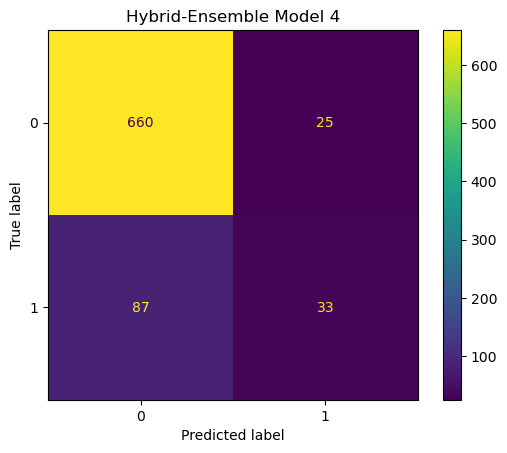

In [35]:
#confusion matrix//code applies labels and specifies the design of the CF//based on prediction results
cm4 = confusion_matrix(y_test, y_pred4, labels=model4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=model4.classes_)
#display the plot and add a title
disp.plot()
plt.title("Hybrid-Ensemble Model 4")

In [36]:
#printing the evaluation metrics for the Hybrid Model
print('model4 metrics\n')
confusion_metrics(cm4)
print('\n\n')

model4 metrics

True Positives: 33
True Negatives: 660
False Positives: 25
False Negatives: 87
--------------------------------------------------
Accuracy: 0.86
Mis-Classification: 0.14
Sensitivity: 0.28
Specificity: 0.96
Precision: 0.57
f_1 Score: 0.37





# Explainability

In [37]:
#packages
import shap
# Limit the explanation to 100 samples of the test data
X_test_sample = shap.sample(X_test, 100)

In [ ]:
explainer = shap.KernelExplainer(model.predict_proba, X_train[:100])
shap_values = explainer.shap_values(X_test_sample)

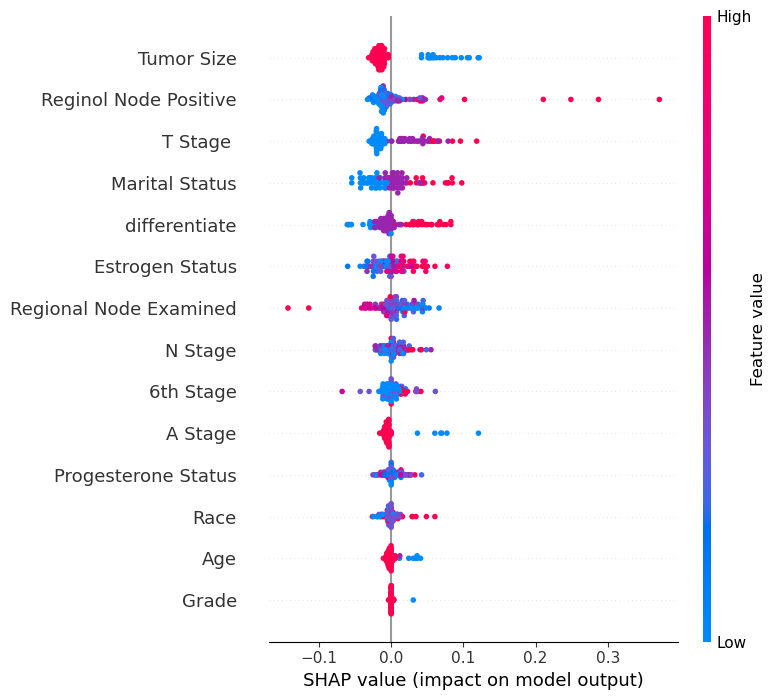

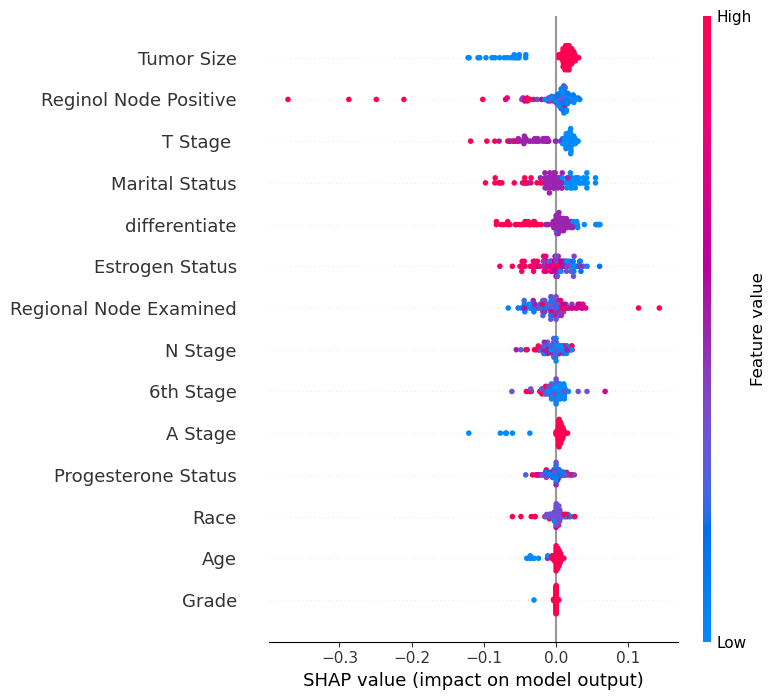

In [40]:
# Extract SHAP values for the died class
shap_values_survival = shap_values[..., 1]

# Visualize feature contributions for died
shap.summary_plot(shap_values_survival, X_test_sample,feature_names=Data.columns, max_display=15)

# Extract SHAP values for the survived class
shap_values_died = shap_values[..., 0]

# Visualize feature contributions for survived
shap.summary_plot(shap_values_died, X_test_sample,feature_names=Data.columns, max_display=15)

Model 2

In [41]:
explainer1 = shap.KernelExplainer(model2.predict_proba, X_train[:100])
shap_values1 = explainer1.shap_values(X_test_sample)

  0%|          | 0/100 [00:00<?, ?it/s]

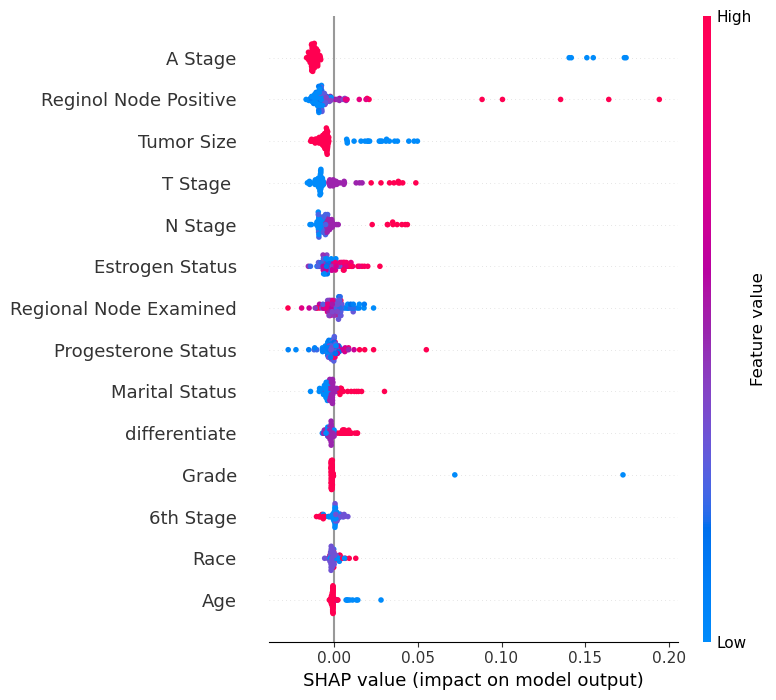

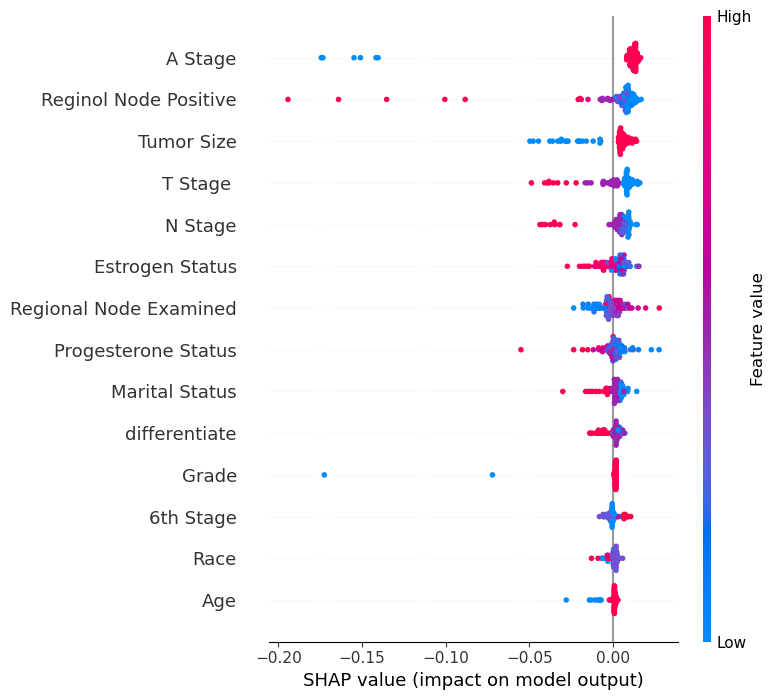

In [43]:
# Extract SHAP values for the died class
shap_values_survival1 = shap_values1[..., 1]

# Visualize feature contributions for died
shap.summary_plot(shap_values_survival1, X_test_sample,feature_names=Data.columns, max_display=15)

# Extract SHAP values for the alive class
shap_values_died2 = shap_values1[..., 0]

# Visualize feature contributions for alive
shap.summary_plot(shap_values_died2, X_test_sample,feature_names=Data.columns, max_display=15)

In [44]:
explainer2 = shap.KernelExplainer(model3.predict_proba, X_train[:100])
shap_values2 = explainer2.shap_values(X_test_sample)

  0%|          | 0/100 [00:00<?, ?it/s]

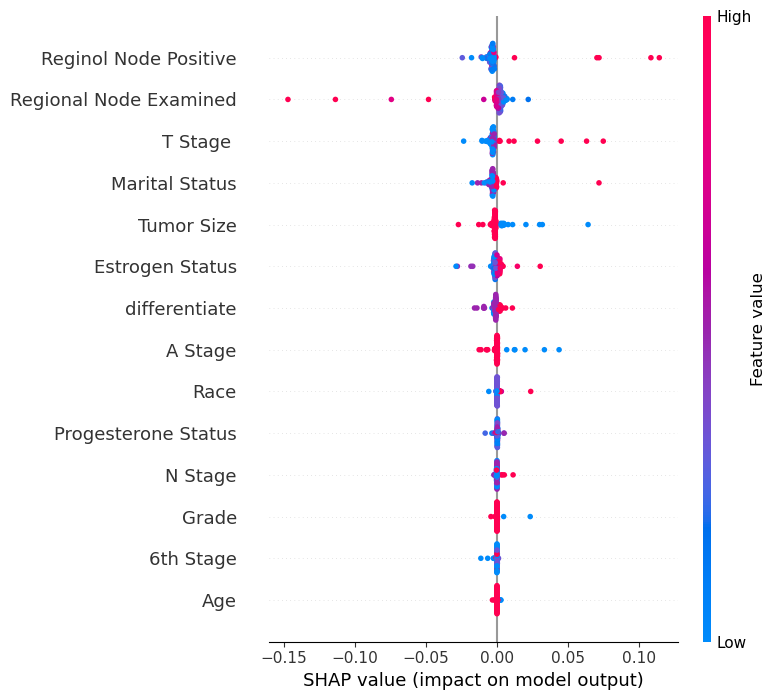

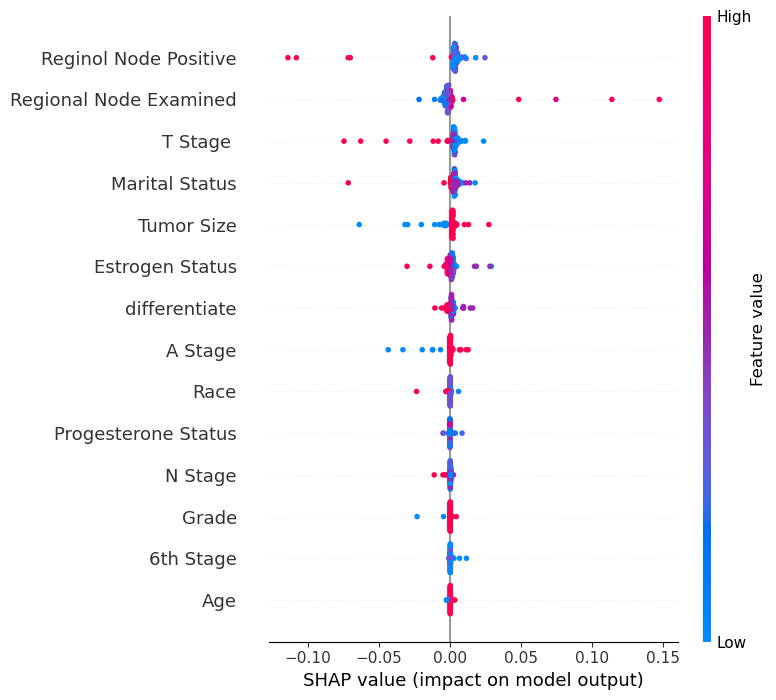

In [45]:
# Extract SHAP values for the died class
shap_values_survival3 = shap_values2[..., 1]

# Visualize feature contributions for died
shap.summary_plot(shap_values_survival3, X_test_sample,feature_names=Data.columns, max_display=15)

# Extract SHAP values for the survival class
shap_values_died4 = shap_values2[..., 0]

# Visualize feature contributions for survival
shap.summary_plot(shap_values_died4, X_test_sample,feature_names=Data.columns, max_display=15)

In [46]:
explainer3 = shap.KernelExplainer(model4.predict_proba, X_train[:100])
shap_values3 = explainer3.shap_values(X_test_sample)

  0%|          | 0/100 [00:00<?, ?it/s]

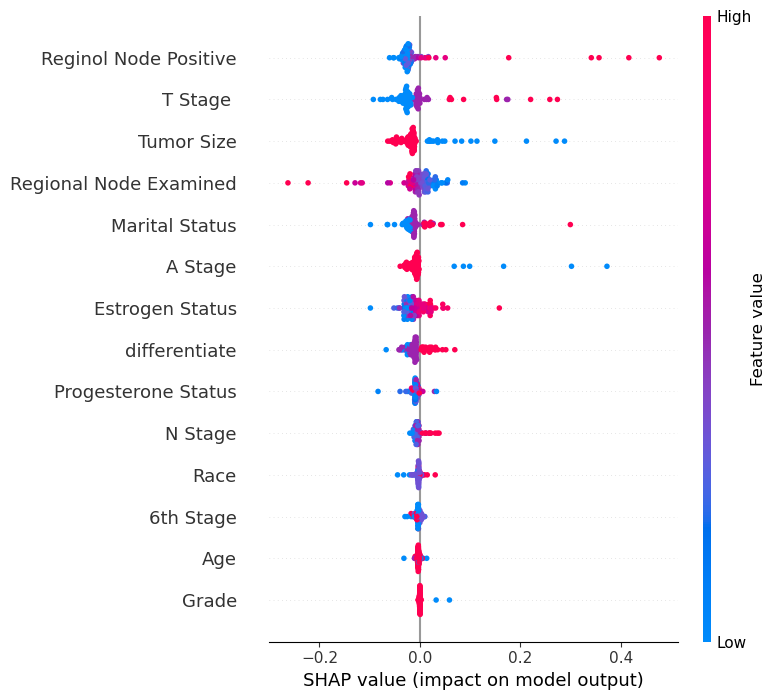

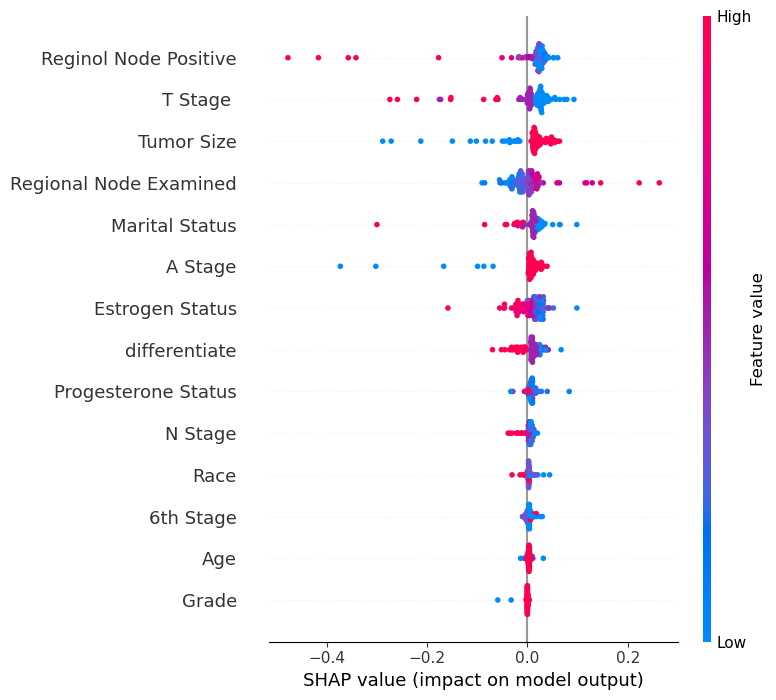

In [47]:
# Extract SHAP values for the died class
shap_values_survival5 = shap_values3[..., 1]

# Visualize feature contributions for died
shap.summary_plot(shap_values_survival5, X_test_sample,feature_names=Data.columns, max_display=15)

# Extract SHAP values for the survival class
shap_values_died6 = shap_values3[..., 0]

# Visualize feature contributions for survival
shap.summary_plot(shap_values_died6, X_test_sample,feature_names=Data.columns, max_display=15)
